In [ ]:
#importing some necessary libraries for future analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ***Loading Dataset***

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.size

1000

In [ ]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

## ***Exploratory Data Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


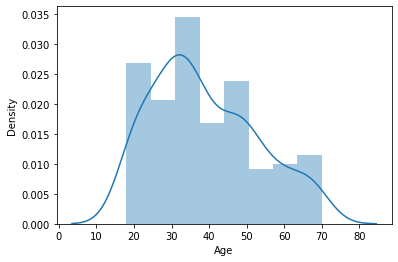

In [ ]:
sns.distplot(df['Age'])

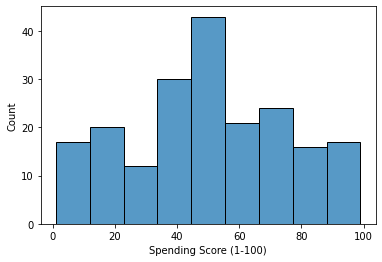

In [ ]:
sns.histplot(df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


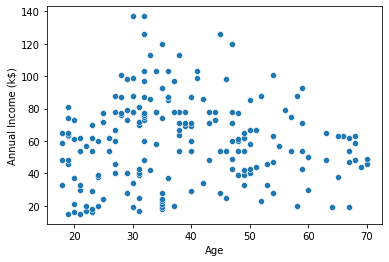

In [ ]:
sns.scatterplot(df['Age'],df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


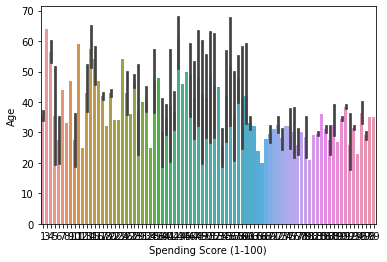

In [ ]:
sns.barplot(df['Spending Score (1-100)'],df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


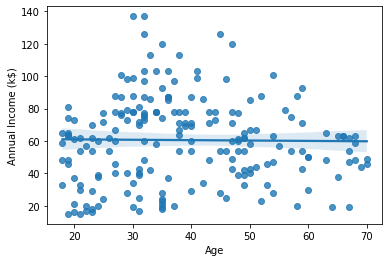

In [ ]:
sns.regplot(df['Age'],df['Annual Income (k$)'])

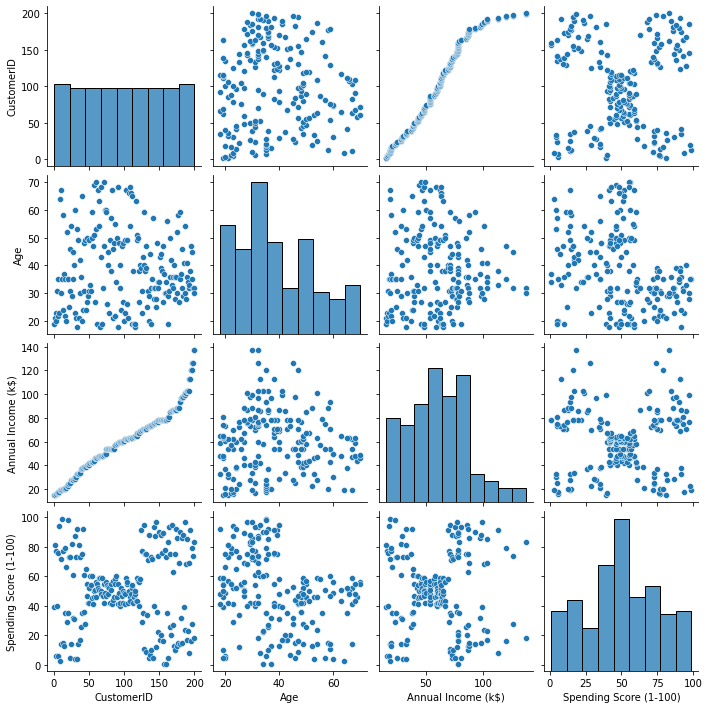

In [ ]:
sns.pairplot(df)

## ***Descriptive Statistics***

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df['Age'].mode()

0    32
dtype: int64

In [ ]:
df['Annual Income (k$)'].var()

689.8355778894472

## ***Looking For Null Values***

In [ ]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## ***Outlier Detection & Replacing Outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


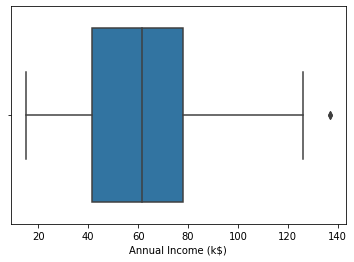

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

In [ ]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_bound,upper_bound,np.where(df['Annual Income (k$)']<lower_bound,lower_bound,df['Annual Income (k$)']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


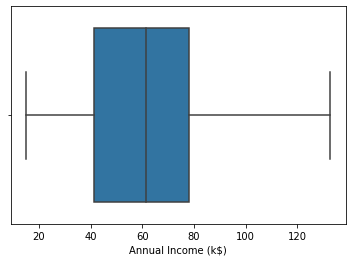

In [ ]:
sns.boxplot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


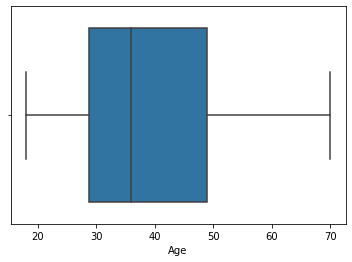

In [ ]:
sns.boxplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


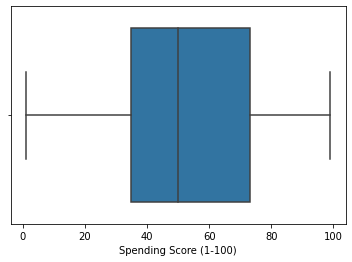

In [ ]:
sns.boxplot(df['Spending Score (1-100)'])

## ***Exploring Categorical Columns***

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


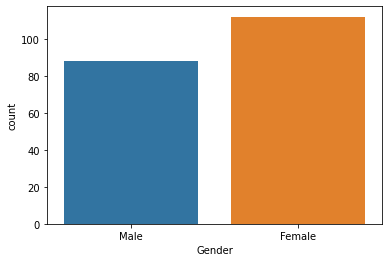

In [ ]:
sns.countplot(df['Gender'])

## ***Label Encoding***

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [ ]:
new_df=df.drop(['CustomerID'],axis=1)
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


## ***Scaling The Data***

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=pd.DataFrame(sc.fit_transform(new_df),columns=new_df.columns)
scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.745429,-0.434801
1,1.128152,-1.281035,-1.745429,1.195704
2,-0.886405,-1.352802,-1.707083,-1.715913
3,-0.886405,-1.137502,-1.707083,1.040418
4,-0.886405,-0.563369,-1.668737,-0.395980


## ***Kmean Clustering***

In [ ]:
from sklearn import cluster

In [ ]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(scaled)
    error.append(kmeans.inertia_)

In [ ]:
error

[799.9999999999998,
 588.8027143528254,
 476.88736023197646,
 386.74906683579184,
 325.6244485567941,
 278.41694976170555,
 235.7830051691861,
 199.77471678255978,
 176.49597500635298,
 151.34911220026675]

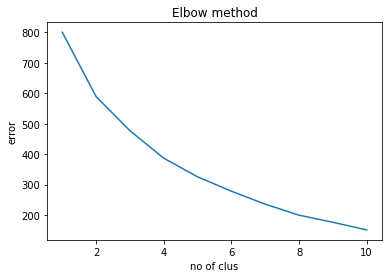

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [ ]:
k_model=cluster.KMeans(n_clusters=4,init='k-means++',random_state=0)

In [ ]:
k_model.fit(scaled)

KMeans(n_clusters=4, random_state=0)

In [ ]:
y_kmean=k_model.predict(scaled)
y_kmean

array([0, 0, 1, 2, 2, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 2, 3, 1, 1, 1, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 3, 0, 3, 0, 3, 0,
       2, 2, 3, 2, 1, 0, 3, 2, 1, 0, 2, 2, 3, 0, 3, 2, 1, 0, 3, 0, 1, 2,
       1, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 0, 3, 0, 3, 0, 1, 2,
       3, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 1, 2, 1, 0,
       3, 0], dtype=int32)

In [ ]:
k_model.predict([[1,25,18,40]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int32)

In [ ]:
scaled['output'] = pd.Series(y_kmean)

In [ ]:
scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),output
0,1.128152,-1.424569,-1.745429,-0.434801,0
1,1.128152,-1.281035,-1.745429,1.195704,0
2,-0.886405,-1.352802,-1.707083,-1.715913,1
3,-0.886405,-1.137502,-1.707083,1.040418,2
4,-0.886405,-0.563369,-1.668737,-0.395980,2


In [ ]:
scaled.shape

(200, 5)

## ***Independent And Depedent Features***

In [ ]:
Independent=scaled.drop(['output'],axis=1)
Dependent=scaled['output']
Independent.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.745429,-0.434801
1,1.128152,-1.281035,-1.745429,1.195704
2,-0.886405,-1.352802,-1.707083,-1.715913
3,-0.886405,-1.137502,-1.707083,1.040418
4,-0.886405,-0.563369,-1.668737,-0.395980


In [ ]:
Dependent.head()

0    0
1    0
2    1
3    2
4    2
Name: output, dtype: int32

# ***Splitting Into Train and Test***

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Independent,Dependent,test_size=0.3,random_state=0)

## ***Random Forest Algorithm***

***Training***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)

***Testing***

In [ ]:
y_pred=model.predict(x_test)

## ***Evaluation Metrics***

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math

In [ ]:
#mean squared error
MSE=mean_squared_error(y_test,y_pred)
print("MSE",MSE)

MSE 0.016666666666666666


In [ ]:
#Root mean squared error
RMSE=math.sqrt(MSE)
print("RMSE",RMSE)

RMSE 0.12909944487358055


In [ ]:
#checking the performance of the model using r2_score 
r2=r2_score(y_test,y_pred)
print("R2_score:",r2)

R2_score: 0.9850411368735976


In [ ]:
#Adjusted R square
Adjusted_R2=1-(1-r2*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
print("Adjusted R2:",Adjusted_R2)

Adjusted R2: 1.0566804922825865


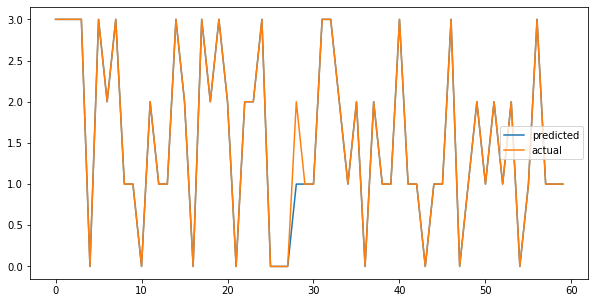

In [ ]:
#plot for predicted and actual price 
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["predicted","actual"])
plt.show()